# EDA CREDIT ASSIGNMENT - Nivethini Senthilselvan

### Importing the necessary libraries

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Reading the datasets using pandas

In [103]:
application_dataset = pd.read_csv("application_data.csv")
previous_appplication_dataset = pd.read_csv("previous_application.csv")


In [104]:
#Printing  the information about the attributes of application_dataset
application_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
#Printing  the information about the attributes of previous_application_dataset
previous_appplication_dataset.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
#Getting the shape of the dataframe
print(application_dataset.shape)
print(previous_appplication_dataset.shape)

(307511, 122)
(1670214, 37)


In [107]:
#Removing/droping the unwanted columns in application_dataset to make the dataset more simple and precisely readable in 
#order to achieve our goal of identifying the defaulters

#Creating a list of columns to be dropped
delete_cols = ["FLAG_PHONE", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START", "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG", "YEARS_BUILD_AVG", "COMMONAREA_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG", "FLOORSMAX_AVG", "FLOORSMIN_AVG", "LANDAREA_AVG", "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG", "APARTMENTS_MODE", "BASEMENTAREA_MODE", "YEARS_BEGINEXPLUATATION_MODE", "YEARS_BUILD_MODE", "COMMONAREA_MODE", "ELEVATORS_MODE", "ENTRANCES_MODE", "FLOORSMAX_MODE", "FLOORSMIN_MODE", "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE","LIVINGAREA_MODE", "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE", "APARTMENTS_MEDI", "BASEMENTAREA_MEDI", "YEARS_BEGINEXPLUATATION_MEDI" ,"YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI", "ENTRANCES_MEDI", "FLOORSMAX_MEDI", "FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "TOTALAREA_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE", "OBS_30_CNT_SOCIAL_CIRCLE",
"DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5",  
"FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]

### Dropped columns in application_dataset & the reason for dropping

###### FLAG_PHONE - Repeatative column with FLAG_WORK_PHONE.
###### REGION_RATING_CLIENT - Company's rating of client's region is unwanted.
###### REGION_RATING_CLIENT_W_CITY - Company's rating of client's city is unwanted.
###### WEEKDAY_APPR_PROCESS_START - Day of application is unnecessary.
###### HOUR_APPR_PROCESS_START - Hour of application is unnecessary for our goal.
###### REG_REGION_NOT_WORK_REGION - Definetly work and residence address will be different. Not a valid comparison.
###### LIVE_REGION_NOT_WORK_REGION - Definetly work and residence address will be different. Not a valid comparison.
###### REG_CITY_NOT_WORK_CITY - Repeatative  with REG_REGION_NOT_WORK_REGION
###### LIVE_CITY_NOT_WORK_CITY - Repeatative with LIVE_REGION_NOT_WORK_REGION
###### EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 - Unnecessary to our goal
###### From APARTMENTS_AVG to EMERGENCYSTATE_MODE - Unnecessary to our goal
###### OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE - Unnecessary to our goal
###### From FLAG_DOCUMENT_2 to FLAG_DOCUMENT_21 - Unnecessary to our goal
###### AMT_REQ_CREDIT_BUREAU_HOUR, DAY - May be insufficient
###### AMT_REQ_CREDIT_BUREAU_MON, QRT, YEAR - Might be good data, but excluding the week before application seems invalid

In [108]:
#Removing the above mentioned columns using drop method
application_dataset = application_dataset.drop(columns=delete_cols, axis=1)

In [109]:
#Checking the shape of the dataframe after dropping the unnecessary columns
application_dataset.shape

(307511, 35)

In [110]:
#Getting the info of the dataframe
application_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

# Data Cleaning

#### Checking the percentage of missing values in the dataframe

In [111]:
application_dataset.isnull().sum() * 100 / len(application_dataset)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OWN_CAR_AGE                   65.990810
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000


In [112]:
#Dropping the column having more than 40% of missing values : ie OWN_CAR_AGE
application_dataset = application_dataset.drop(columns = ["OWN_CAR_AGE"], axis=1)

In [113]:
#Ensure the OWN_CAR_AGE is being removed and check the dataframe again for further analysis of missing values
application_dataset.isnull().sum() * 100/len(application_dataset)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


In [114]:
#Analysing the OCCUPATION_TYPE column as it as 31% of missing value
application_dataset.OCCUPATION_TYPE.value_counts(normalize=True)

OCCUPATION_TYPE
Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: proportion, dtype: float64

###### -> Since OCCUPATION_TYPE is a categorical variable and Laboreres top the column with 26%. 
###### -> But we cannot impute the null values with the mode of the column, because we are really unsure why certain values are missing and the impuation of mode value ie Laboreres may give us wrong analytical insight. 
###### -> Its better to deal the rows with missing values separately or else continue the analysis with the missing values.

In [115]:
#Analysing the AMT_REQ_CREDIT_BUREAU_WEEK column as it as 13% of missing value
application_dataset.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64

##### As AMT_REQ_CREDIT_BUREAU_WEEK is a numerical variable and the percentage of missing value is very less, we can simply impute the mode of the column ie (0.0) for those missing places

In [116]:
#Imputing the missing values of column  AMT_REQ_CREDIT_BUREAU_WEEK with the mode of that column (0.0)
application_dataset.AMT_REQ_CREDIT_BUREAU_WEEK = application_dataset.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(0.0)

In [117]:
#Ensure the AMT_REQ_CREDIT_BUREAU_WEEK has no null values and check the dataframe again for further analysis of missing values
application_dataset.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_EMAIL                        0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS             

In [119]:
#Next highest missing value column is DEF_60_CNT_SOCIAL_CIRCLE. Lets analyse the column for more insights
application_dataset.DEF_60_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)

DEF_60_CNT_SOCIAL_CIRCLE
0.0     0.915922
1.0     0.071262
2.0     0.010343
3.0     0.001951
4.0     0.000440
5.0     0.000065
6.0     0.000010
7.0     0.000003
24.0    0.000003
Name: proportion, dtype: float64

#### Obviously it is same as the AMT_REQ_CREDIT_BUREAU_WEEK column, 0.0 tops the column with more than half of the percentage (91%).
#### Therefore, we can simply impute the mode of the column in the missing value place

In [120]:
#Imputing the missing values of column  DEF_60_CNT_SOCIAL_CIRCLE with the mode of that column (0.0)
application_dataset.DEF_60_CNT_SOCIAL_CIRCLE = application_dataset.DEF_60_CNT_SOCIAL_CIRCLE.fillna(0.0)

In [121]:
#Ensure the DEF_60_CNT_SOCIAL_CIRCLE has no null values and check the dataframe again for further analysis of missing values
application_dataset.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_EMAIL                        0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS             

In [122]:
#Analysing NAME_TYPE_SUITE column for missing values imputation
application_dataset.NAME_TYPE_SUITE.value_counts(normalize=True)

NAME_TYPE_SUITE
Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: proportion, dtype: float64

#### NAME_TYPE_SUITE is a categorical variable. 
#### From the column analysis, it is straightforward that most of the client were unaccompanied. Therefore, we can replace the NaN values with "Unaccompanied"

In [123]:
#Imputing the missing values of column NAME_TYPE_SUITE with the mode of that column (Unaccompanied)
application_dataset.NAME_TYPE_SUITE = application_dataset.NAME_TYPE_SUITE.fillna("Unaccompanied")

In [124]:
#Ensure the NAME_TYPE_SUITE has no null values and check the dataframe again for further analysis of missing values
application_dataset.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_EMAIL                        0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS             

In [125]:
#Analysing AMT_GOODS_PRICE column
application_dataset.AMT_GOODS_PRICE.value_counts(normalize=True)

AMT_GOODS_PRICE
450000.0     0.084698
225000.0     0.082289
675000.0     0.081248
900000.0     0.050177
270000.0     0.037197
               ...   
1265751.0    0.000003
503266.5     0.000003
810778.5     0.000003
666090.0     0.000003
743863.5     0.000003
Name: proportion, Length: 1002, dtype: float64

#### AMT_GOODS_PRICE is a numerical variable. Hence we should take the average value of this column and impute in the missing value place

In [126]:
#Getting the average of AMT_GOODS_PRICE column and imputing that value in place of missing value
print(application_dataset.AMT_GOODS_PRICE.mean())
application_dataset.AMT_GOODS_PRICE = application_dataset.AMT_GOODS_PRICE.fillna(538396.2074288895)

538396.2074288895


In [127]:
#Ensure the AMT_GOODS_PRICE has no null values and check the dataframe again for further analysis of missing values
application_dataset.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_EMAIL                        0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS             

In [128]:
#Analysing AMT_ANNUITY column
application_dataset.AMT_ANNUITY.value_counts()

AMT_ANNUITY
9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: count, Length: 13672, dtype: int64

#### Since AMT_ANNUITY is a numerical variable, we can take the mean of this column and impute in missing value place

In [129]:
#Getting mean of AMT_ANNUITY and replacing the null values with the obtained mean
print(application_dataset.AMT_ANNUITY.mean())
application_dataset.AMT_ANNUITY = application_dataset.AMT_ANNUITY.fillna(27108.573909183444)

27108.573909183444


In [130]:
#Ensure the AMT_ANNUITY has no null values and check the dataframe again for further analysis of missing values
application_dataset.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_EMAIL                        0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS             

#### NOTE:
1. Since OCCUPATION_TYPE is a critical variable, we cannot impute any wrong value, which may misguide our analysis. As for now I am simply ignoring the null values. In later part, if those null values affect our analysis, further actions will be taken
2. DAYS_LAST_PHONE_CHANGE has one null value, it is ignored as for now as it may come under suspected defaulters in upcomming analysis

# Identifying any outliers present in the major critical variables

### First Identifying the top critical variables in the dataframe

1. CNT_CHILDREN
2. AMT_INCOME_TOTAL
3. AMT_CREDIT
4. AMT_ANNUITY
5. AMT_GOODS_PRICE
6. DAYS_BIRTH
7. DAYS_EMPLOYED
8. DAYS_REGISTRATION
9. DAYS_ID_PUBLISH
10. CNT_FAM_MEMBERS
11. DEF_60_CNT_SOCIAL_CIRCLE
12. DAYS_LAST_PHONE_CHANGE
13. AMT_REQ_CREDIT_BUREAU_WEEK

In [131]:
application_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307511 non-null  float64
 10  AMT_GOODS_PRICE             307511 non-null  float64
 11  NAME_TYPE_SUITE             307511 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

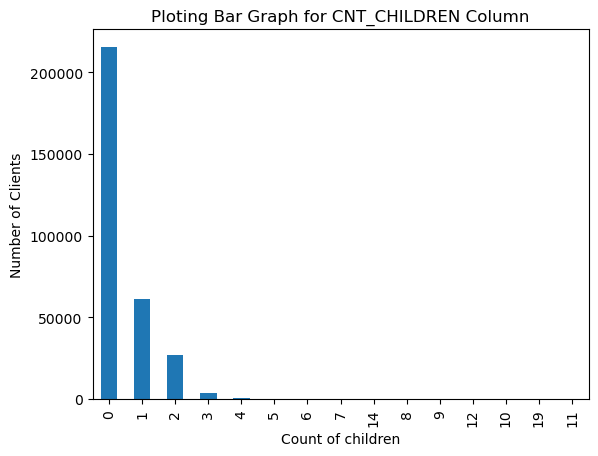

In [132]:
#Checking outliers in CNT_CHILDREN Column
#print(application_dataset.CNT_CHILDREN.value_counts())
application_dataset.CNT_CHILDREN.value_counts().plot.bar()
plt.title("Ploting Bar Graph for CNT_CHILDREN Column")
plt.ylabel("Number of Clients")
plt.xlabel("Count of children")
plt.show()

### Observation:
1. There is no huge/bizarre number seen, though clients having 8 or more children seems to look quite abnormal, but the single digit clients number does not add up any value
2. Therefore, CNT_CHILDREN Column does not seem to have a outlier

Text(0, 0.5, 'Total Income Amount')

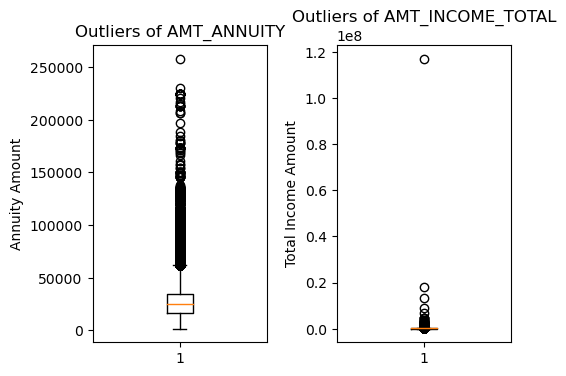

In [133]:
#Finding outliers in AMT_ANNUITY and AMT_INCOME_TOTAL columns using subplot
plt.subplot(1, 2, 1) 
plt.boxplot(application_dataset.AMT_ANNUITY)
plt.title("Outliers of AMT_ANNUITY")
plt.ylabel("Annuity Amount")
plt.tight_layout(pad = 5.0)
plt.subplot(1, 2, 2) 
plt.boxplot(application_dataset.AMT_INCOME_TOTAL)
plt.title("Outliers of AMT_INCOME_TOTAL")
plt.ylabel("Total Income Amount")



### Observation:
1. It is observed that, there are outliers present in the AMT_ANNUITY and AMT_INCOME_TOTAL column, where in AMT_ANNUITY the 100th percentile falls between 50,000 and 1,00,000 and IQR is below 50,000.
2. The higher values present in the AMT_ANNUITY and AMT_INCOME_TOTAL may represent some exceptional business tycoons and financially successful clients.


Text(0, 0.5, 'Total Goods Price')

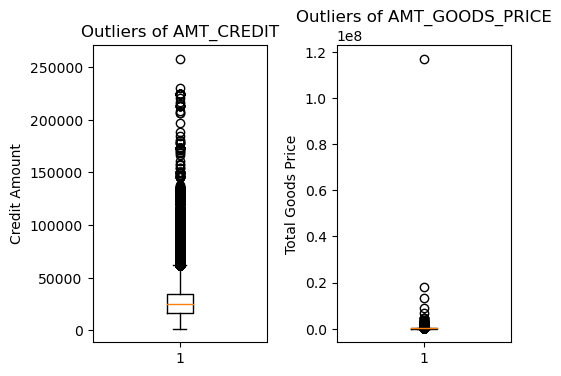

In [134]:
#Finding outliers in AMT_CREDIT and AMT_GOODS_PRICE columns using subplot
plt.subplot(1, 2, 1) 
plt.boxplot(application_dataset.AMT_ANNUITY)
plt.title("Outliers of AMT_CREDIT")
plt.ylabel("Credit Amount")
plt.tight_layout(pad = 5.0)
plt.subplot(1, 2, 2) 
plt.boxplot(application_dataset.AMT_INCOME_TOTAL)
plt.title("Outliers of AMT_GOODS_PRICE")
plt.ylabel("Total Goods Price")



Text(0, 0.5, 'Good Price Amount')

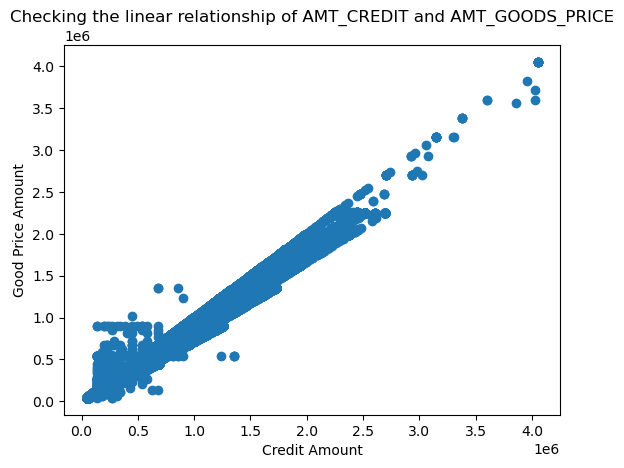

In [135]:
#we need to analyse that higher the credit amount, higher should be good price. Lets check this using scatter plot
plt.scatter(application_dataset.AMT_CREDIT, application_dataset.AMT_GOODS_PRICE)
plt.title("Checking the linear relationship of AMT_CREDIT and AMT_GOODS_PRICE")
plt.xlabel("Credit Amount")
plt.ylabel("Good Price Amount")

### Observation:
1. Though AMT_CREDIT and AMT_GOODS_PRICE has few outliers, it is cut and clear that, there is a  high positive correlation between two variables, ie higher the credit amount, higher the goods price. 

### Note:
- Before analysing the other columns, I observe that the DAYS column values are being in negative integers. Not sure why it has been in negative, may be a data error. But for our analysis, let's remove the negative sign and proceed to get insights

In [136]:
#Fixing the DAYS Column and converting it to approximate years
application_dataset.DAYS_BIRTH = application_dataset.DAYS_BIRTH.apply(lambda x : abs(x)//365)
application_dataset.DAYS_EMPLOYED = application_dataset.DAYS_EMPLOYED.apply(lambda x : abs(x)//365)
application_dataset.DAYS_ID_PUBLISH = application_dataset.DAYS_ID_PUBLISH.apply(lambda x : abs(x)//365)
application_dataset.DAYS_REGISTRATION = application_dataset.DAYS_REGISTRATION.apply(lambda x : abs(x)//365)
application_dataset.DAYS_LAST_PHONE_CHANGE = application_dataset.DAYS_LAST_PHONE_CHANGE.apply(lambda x : abs(x)//365.0)

Text(0, 0.5, 'No.of years client employed before application')

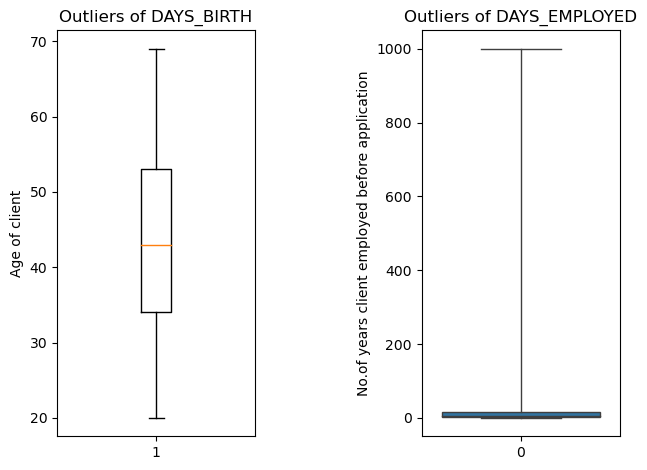

In [137]:
plt.subplot(1, 2, 1) 
plt.boxplot(application_dataset.DAYS_BIRTH)
plt.title("Outliers of DAYS_BIRTH")
plt.ylabel("Age of client")
plt.tight_layout(w_pad = 12.0)
plt.subplot(1, 2, 2) 
sns.boxplot(application_dataset.DAYS_EMPLOYED, linewidth=1.0,whis=100)
plt.title("Outliers of DAYS_EMPLOYED")
plt.ylabel("No.of years client employed before application")


### Observation:
1. The DAYS_BIRTH column is absolutely fine having the age group between 20 to 70.
2. The DAYS_EMPLOYED column looks fishy, a max of 50 years serivce is acceptable and anything above 50 years are incorrect data

Text(0, 0.5, 'No.of years before the application,client changed the identity-document')

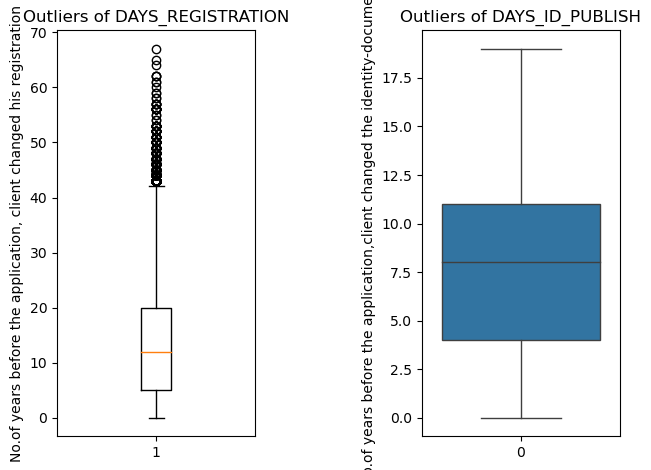

In [138]:
plt.subplot(1, 2, 1) 
plt.boxplot(application_dataset.DAYS_REGISTRATION)
plt.title("Outliers of DAYS_REGISTRATION")
plt.ylabel("No.of years before the application, client changed his registration")
plt.tight_layout(w_pad = 12.0)
plt.subplot(1, 2, 2) 
sns.boxplot(application_dataset.DAYS_ID_PUBLISH, linewidth=1.0, whis=100)
plt.title("Outliers of DAYS_ID_PUBLISH")
plt.ylabel("No.of years before the application,client changed the identity-document")

### Observation:
1. From the above boxplot, it is obvious that there are some outliers present in DAYS_REGISTRATION column. But these outliers are acceptable because some may live in their ancestral property which may have registered some 50/60 years back.
2. The DAYS_ID_PUBLISH has no outliers and it is perfectly fine.

Text(0.5, 1.0, 'Bar plot of Last phone change of clients')

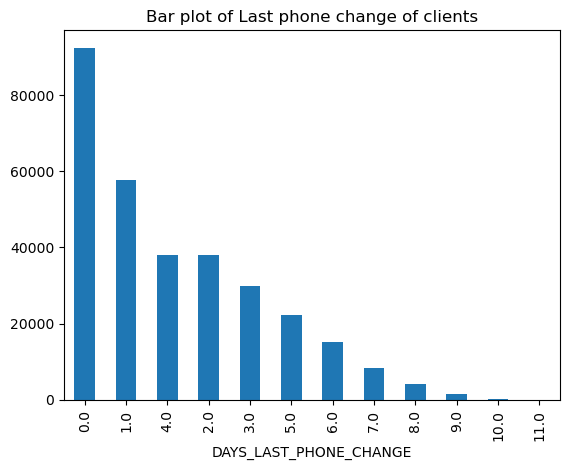

In [139]:
#Analysing the DAYS_LAST_PHONE_CHANGE column using bar graph
application_dataset.DAYS_LAST_PHONE_CHANGE.value_counts().plot.bar()
plt.title("Bar plot of Last phone change of clients")

### Observation:
- It is observed that, more than 80,000 clients have changed thier phone number very recently before the application

Text(0, 0.5, 'DEF_60_CNT_SOCIAL_CIRCLE')

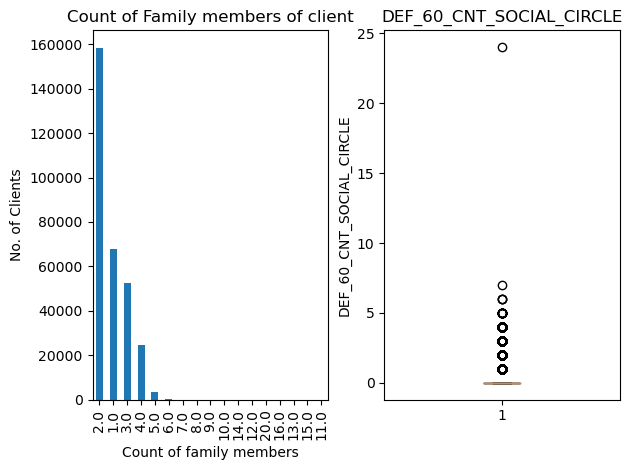

In [140]:
plt.subplot(1, 2, 1) 
application_dataset.CNT_FAM_MEMBERS.value_counts().plot.bar()
plt.title("Count of Family members of client")
plt.ylabel("No. of Clients")
plt.xlabel("Count of family members")
plt.tight_layout(w_pad = 4.0)
plt.subplot(1, 2, 2) 
plt.boxplot(application_dataset.DEF_60_CNT_SOCIAL_CIRCLE)
plt.title("DEF_60_CNT_SOCIAL_CIRCLE")
plt.ylabel("DEF_60_CNT_SOCIAL_CIRCLE")



### Observation:
1. From the bar plot of CNT_FAM_MEMBERS, it is obivous that most of the clients have two members in the family and a max of 12, which appears to be quite common. Hence no major outlier is seen
2. For the DEF_60_CNT_SOCIAL_CIRCLE column, there are outliers present. Those outliers may be the suspected defaulters we are looking for. 

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_WEEK'>

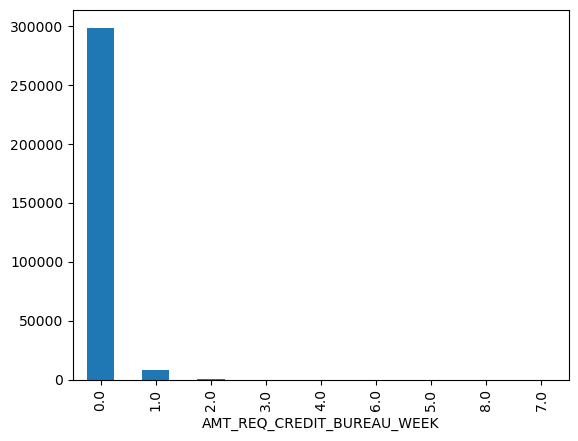

In [141]:
#Analysing AMT_REQ_CREDIT_BUREAU_WEEK column using bar plot
application_dataset.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts().plot.bar()

### Observation:
1. On observing the bar graph of AMT_REQ_CREDIT_BUREAU_WEEK column, it is obivous that there are 0 number of enquiries to Credit Bureau about the client one week before application for most of the clients

## Data imbalance
- Lets find out the data imbalance in application_dataset TARGET variable


In [142]:
#finding the data imbalance of TARGET variable
application_dataset.TARGET.value_counts(normalize=True)

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Data imbalance of TARGET variable')

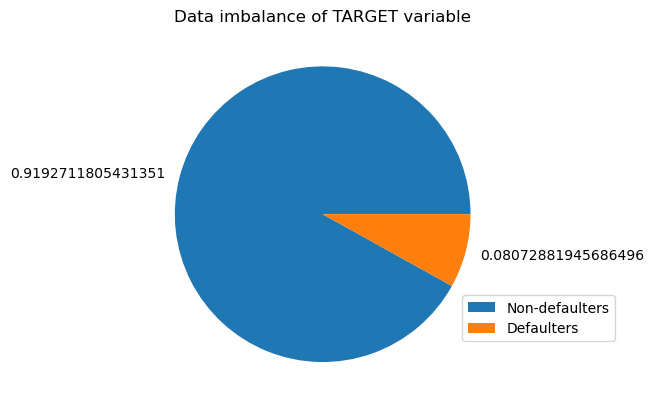

In [143]:
#plotting a pie chart to represent the imbalance of TARGET variable
x = application_dataset.TARGET.value_counts(normalize=True)
plt.pie(x, labels=x)
plt.legend(["Non-defaulters", "Defaulters"], bbox_to_anchor=(1.31,0.3))
plt.title("Data imbalance of TARGET variable")

### Notes:
- It is obvious that, the no of non_defaulters greater than no.of defaulters, which is practical in banks. If not, the banks would have corrupted.

# Univariate and Bivariate Analysis

1. So far, we have got few insights about the data and we cleaned it by imputing the values in missing rows and analysed the kinds of outliers present and the justification for the presence of those outliers.
2. Now let's get into  real time data analysation using univariate, bivariate and multivariate analysis.
3. We need to do the analysis with our target variable ie TARGET vs other critical variables which might give us insight about defaulters in our dataframe
4. Let's Analyse the background of Clients with payment difficulties and all other cases using various analysing methods

#### Univariate analysis of AMT_INCOME_TOTAL column of Clients with payment difficulties

In [146]:
#Creating a separate dataframe for clients having payment difficulties and no payment difficulties
client_payment_diff = application_dataset[application_dataset.TARGET == 1]
client_no_payment_diff = application_dataset[application_dataset.TARGET == 0]
#Print the shape of the newly created dataframes
print(client_payment_diff.shape)
print(client_no_payment_diff.shape)

(24825, 34)
(282686, 34)


#### Note:
- Out of 3,07,511 total clients, 24,825 clients have payment difficulties and 2,82,686 clients have no payment difficulties


In [147]:
client_payment_diff.AMT_INCOME_TOTAL.max()
#bucketing the salaries into categories [<50K, 50K-1L, 1L-5L, 5L-1M, 1M<]
def creating_income_buckets(x):
    if x<50000:
        return '<50K'
    elif 50000<=x<100000:
        return '50K-1L'
    elif 100000<=x<500000:
        return '1L-5L'
    elif 500000<=x<1000000:
        return '5L-1M'
    elif 1000000<=x<50000000:
        return "1M-50M"
    else:
        return '1M<'
client_payment_diff['Income_buckets'] = client_payment_diff.AMT_INCOME_TOTAL.apply(lambda x : creating_income_buckets(x))

In [148]:
client_no_payment_diff['Income_buckets'] = client_no_payment_diff.AMT_INCOME_TOTAL.apply(lambda x : creating_income_buckets(x))

Text(0, 0.5, 'No. of Clients')

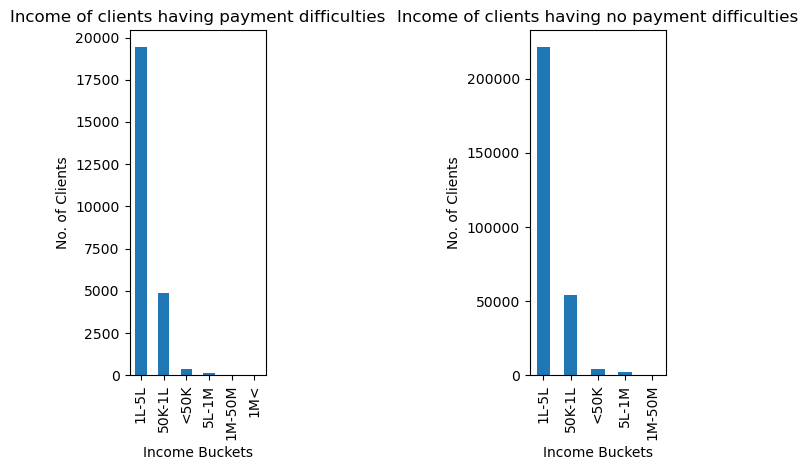

In [149]:
plt.subplot(1,2,1)
client_payment_diff.Income_buckets.value_counts().plot.bar()
plt.title("Income of clients having payment difficulties")
plt.xlabel("Income Buckets")
plt.ylabel("No. of Clients")
plt.tight_layout(w_pad=19.0)
plt.subplot(1,2,2)
client_no_payment_diff.Income_buckets.value_counts().plot.bar()
plt.title("Income of clients having no payment difficulties")
plt.xlabel("Income Buckets")
plt.ylabel("No. of Clients")

### Observation:
1. It is quite surprising that, more client's income falls in the group of 1L-5L in both the bar graphs. But clients with no payment difficulties have more number of people who are receiving a income of 5L-1M than people in clients with payment difficulties.
2. This univariate analysis of AMT_INCOME_TOTAL column of both the types of client does not provide us great insights about the defaulters. Since both the bar graphs looks alike more or less.

#### Now let's compare the credit amount for both type of clients[with difficulty & no difficulty]

#### Univariate analysis of credit amount for both type of clients[with difficulty & no difficulty]

In [150]:
client_payment_diff['Credit_bucket'] = client_payment_diff.AMT_CREDIT.apply(lambda x : creating_income_buckets(x))
client_no_payment_diff['Credit_bucket'] = client_no_payment_diff.AMT_CREDIT.apply(lambda x : creating_income_buckets(x))

Text(0, 0.5, 'No. of Clients')

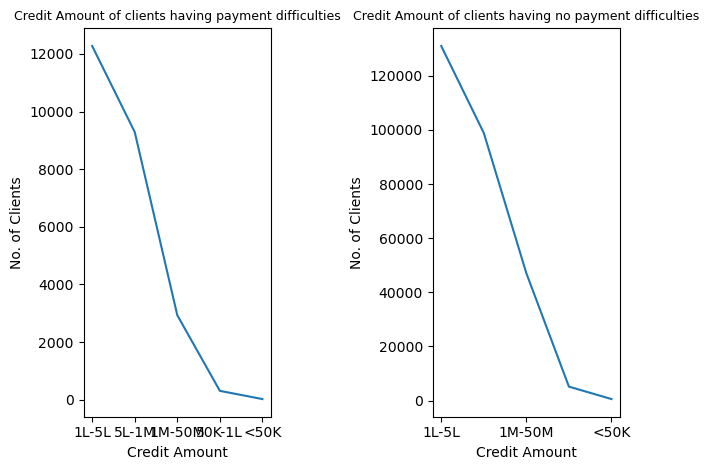

In [151]:
#Creating subplot
plt.subplot(1,2,1)
client_payment_diff.Credit_bucket.value_counts().plot.line()
plt.title("Credit Amount of clients having payment difficulties", fontsize=9)
plt.xlabel("Credit Amount")
plt.ylabel("No. of Clients")
plt.tight_layout(w_pad=11.0)
plt.subplot(1,2,2)
client_no_payment_diff.Credit_bucket.value_counts().plot.line()
plt.title("Credit Amount of clients having no payment difficulties", fontsize=9)
plt.xlabel("Credit Amount")
plt.ylabel("No. of Clients")

### Observation:
- The two line graph of both types of clients looks almost similar. And most of the client from both the types have credit amount between 1L-5L.

### Univariate analysis of accompaning person for both type of clients[with difficulty & no difficulty]

Text(0.5, 0, 'Percentage of Clients')

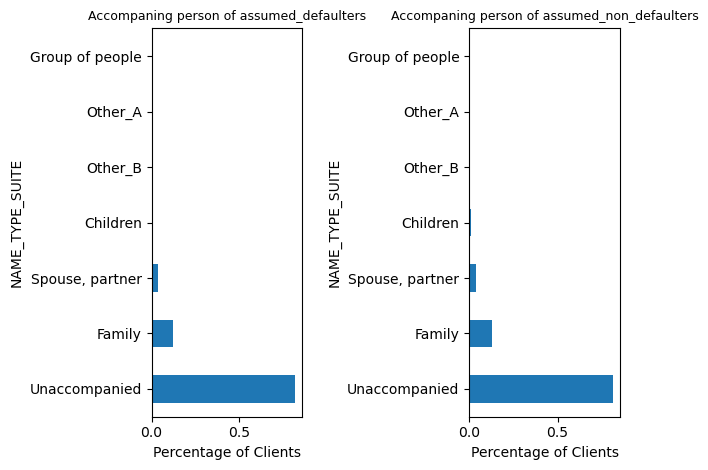

In [152]:
plt.subplot(1,2,1)
client_payment_diff.NAME_TYPE_SUITE.value_counts(normalize=True).plot.barh()
plt.title("Accompaning person of assumed_defaulters", fontsize=9)
plt.xlabel("Percentage of Clients")
plt.tight_layout(w_pad=12.0)
plt.subplot(1,2,2)
client_no_payment_diff.NAME_TYPE_SUITE.value_counts(normalize=True).plot.barh()
plt.title("Accompaning person of assumed_non_defaulters", fontsize=9)
plt.xlabel("Percentage of Clients")

### Observation:
- Again the two bar graph of both types of clients looks almost similar. And most of the client from both the types have came alone

### Univariate analysis of Income Type for both type of clients[with difficulty & no difficulty]

Text(0.5, 0, 'Percentage of Clients')

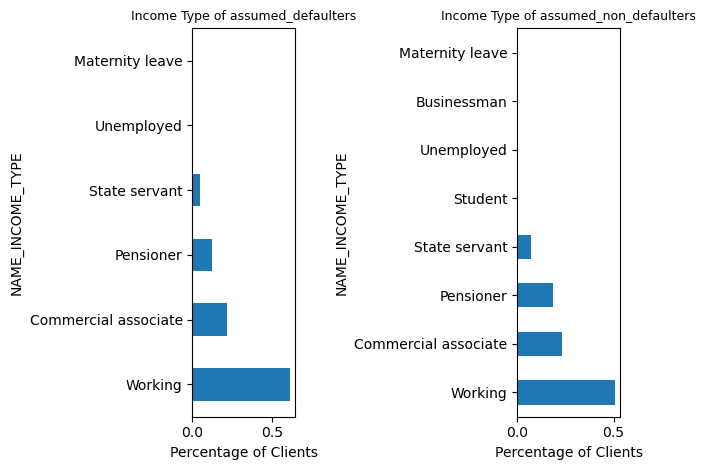

In [153]:
plt.subplot(1,2,1)
client_payment_diff.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title("Income Type of assumed_defaulters", fontsize=9)
plt.xlabel("Percentage of Clients")
plt.tight_layout(w_pad=16.0)
plt.subplot(1,2,2)
client_no_payment_diff.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.title("Income Type of assumed_non_defaulters", fontsize=9)
plt.xlabel("Percentage of Clients")

### Obervation:
- More or less percentage of both type of clients have same number for each income type according to their respective total count. 

### Univariate analysis of FAMILY STATUS for both type of clients[with difficulty & no difficulty]

Text(0.5, 0, 'Percentage of Clients')

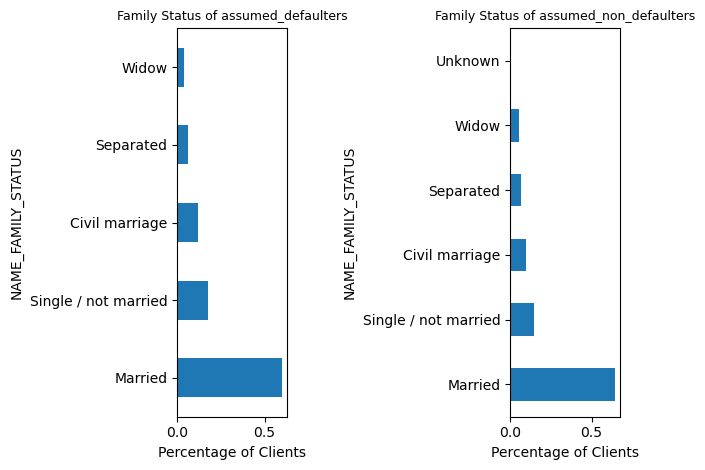

In [154]:
plt.subplot(1,2,1)
client_payment_diff.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title("Family Status of assumed_defaulters", fontsize=9)
plt.xlabel("Percentage of Clients")
plt.tight_layout(w_pad=16.0)
plt.subplot(1,2,2)
client_no_payment_diff.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.title("Family Status of assumed_non_defaulters", fontsize=9)
plt.xlabel("Percentage of Clients")

### Observation:
- No majar changes found between two bar graphs. As most of the clients are married and single.
    

### Univariate analysis of Education Type for both type of clients[with difficulty & no difficulty]


Text(0.5, 0, 'No. of Clients')

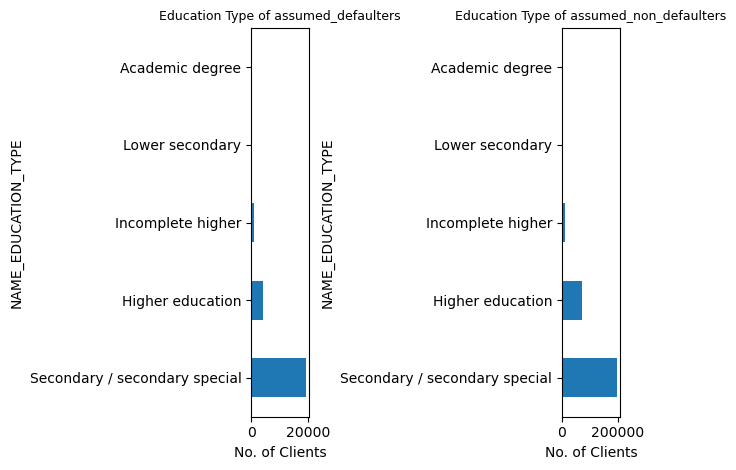

In [155]:
plt.subplot(1,2,1)
client_payment_diff.NAME_EDUCATION_TYPE.value_counts().plot.barh()
plt.title("Education Type of assumed_defaulters", fontsize=9)
plt.xlabel("No. of Clients")
plt.tight_layout(w_pad=17.0)
plt.subplot(1,2,2)
client_no_payment_diff.NAME_EDUCATION_TYPE.value_counts().plot.barh()
plt.title("Education Type of assumed_non_defaulters", fontsize=9)
plt.xlabel("No. of Clients")

### Observation:
- Most of the clients of both the types have completed secondary/secondary special and relatively few have done higher education. Still there are clients with incomplete higher.

### Univariate analysis of Housing Type for both type of clients[with difficulty & no difficulty]

Text(0.5, 0, 'No. of Clients')

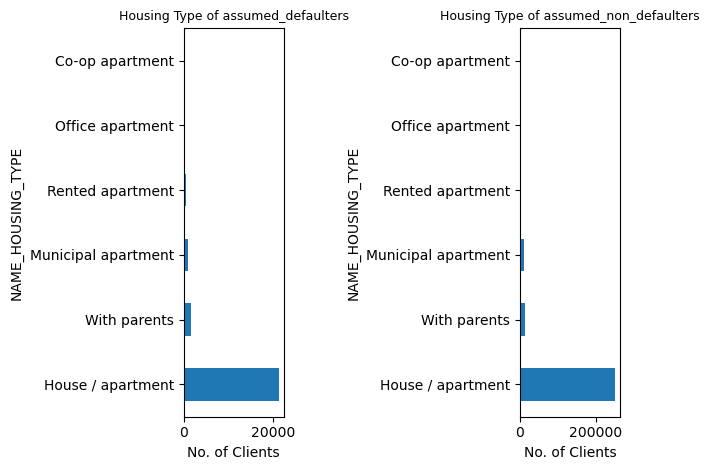

In [156]:
plt.subplot(1,2,1)
client_payment_diff.NAME_HOUSING_TYPE.value_counts().plot.barh()
plt.title("Housing Type of assumed_defaulters", fontsize=9)
plt.xlabel("No. of Clients")
plt.tight_layout(w_pad=17.0)
plt.subplot(1,2,2)
client_no_payment_diff.NAME_HOUSING_TYPE.value_counts().plot.barh()
plt.title("Housing Type of assumed_non_defaulters", fontsize=9)
plt.xlabel("No. of Clients")

### Observation:
- Most of the clients of both types, have own house/apartment and with parents. Rented apartment are quite a few clients only. Therefore, 50% of the clients have their own house. This is good fact to be known, because it makes us curious to do our analysis by questioning us, what stops the assumed defaulters to make their payments.

### Univariate analysis of Age for both type of clients[with difficulty & no difficulty]

In [159]:
#Creating age buckets using func
def creating_age_buckets(x):
    if 20<=x<30:
        return "20-30"
    elif 30<=x<40:
        return "30-40"
    elif 40<=x<50:
        return "40-50"
    elif x<=50<60:
        return "50-60"
    else:
        return "60+"
client_no_payment_diff['Age_Buckets'] = client_no_payment_diff.DAYS_BIRTH.apply(lambda x : creating_age_buckets(x))
client_payment_diff['Age_Buckets']  = client_payment_diff.DAYS_BIRTH.apply(lambda x  : creating_age_buckets(x))

Text(0.5, 0, 'No. of Clients')

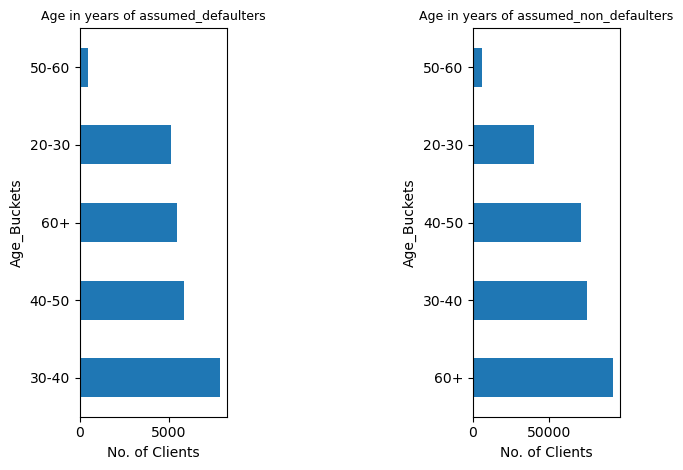

In [160]:
plt.subplot(1,2,1)
client_payment_diff.Age_Buckets.value_counts().plot.barh()
plt.title("Age in years of assumed_defaulters", fontsize=9)
plt.xlabel("No. of Clients")
plt.tight_layout(w_pad=17.0)
plt.subplot(1,2,2)
client_no_payment_diff.Age_Buckets.value_counts().plot.barh()
plt.title("Age in years of assumed_non_defaulters", fontsize=9)
plt.xlabel("No. of Clients")

### Observation:
- Finally, here comes the difference between two graphs, where most of assumed defaulters are comming under the age group of 30-40, whereas in the assumed_non_defaulters most of the clients were 60+.
- From this difference, it is known that, clients who are 60 and above have no difficulties in repaying the loan, since they may recieve any pension amount or through other resources
- But clients under the age buckets of 30-40, who are basically the family man having more responsibilties regarding family growth. So they are having difficulties in replaying the loan amount. This is practical.

### Univariate analysis of Employment years for both type of clients[with difficulty & no difficulty]

In [161]:
def creating_employment_buckets(x):
    if x<5:
        return "<5"
    elif 5<=x<10:
        return "5-10"
    elif 10<=x<20:
        return "10-20"
    elif 20<=x<30:
        return "20-30"
    elif 30<=x<40:
        return "30-40"
    elif 40<=x<50:
        return "40-50"
    elif x<=50<60:
        return "50-60"
    else:
        return "60+"
client_no_payment_diff['Employment_years'] = client_no_payment_diff.DAYS_EMPLOYED.apply(lambda x : creating_employment_buckets(x))
client_payment_diff['Employment_years'] = client_payment_diff.DAYS_EMPLOYED.apply(lambda x : creating_employment_buckets(x))

Text(0.5, 0, 'No. of Clients')

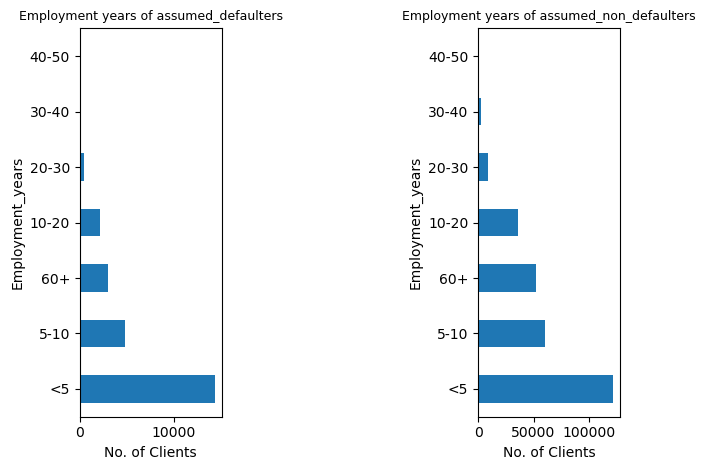

In [162]:
plt.subplot(1,2,1)
client_payment_diff.Employment_years.value_counts().plot.barh()
plt.title("Employment years of assumed_defaulters", fontsize=9)
plt.xlabel("No. of Clients")
plt.tight_layout(w_pad=17.0)
plt.subplot(1,2,2)
client_no_payment_diff.Employment_years.value_counts().plot.barh()
plt.title("Employment years of assumed_non_defaulters", fontsize=9)
plt.xlabel("No. of Clients")

### Observation:
- Most of the clients of both the types have experience of less than 5 years. For assumed_defaulters, the age is 30-40 and less than 5 years of work experience may have lot of pressure to repay the loan, which is practical.

### Univariate analysis of own car status and own house status of both types of clients[defaulters & non defaulters]

Text(0.5, 0, 'No. of Clients')

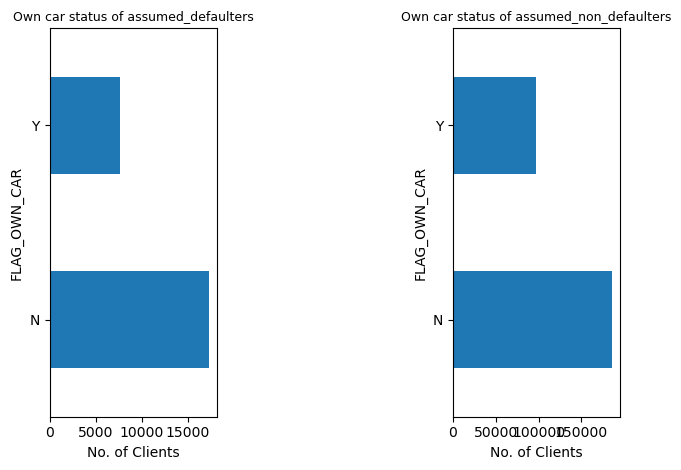

In [163]:
plt.subplot(1,2,1)
client_payment_diff.FLAG_OWN_CAR.value_counts().plot.barh()
plt.title("Own car status of assumed_defaulters", fontsize=9)
plt.xlabel("No. of Clients")
plt.tight_layout(w_pad=17.0)
plt.subplot(1,2,2)
client_no_payment_diff.FLAG_OWN_CAR.value_counts().plot.barh()
plt.title("Own car status of assumed_non_defaulters", fontsize=9)
plt.xlabel("No. of Clients")


Text(0.5, 0, 'No. of Clients')

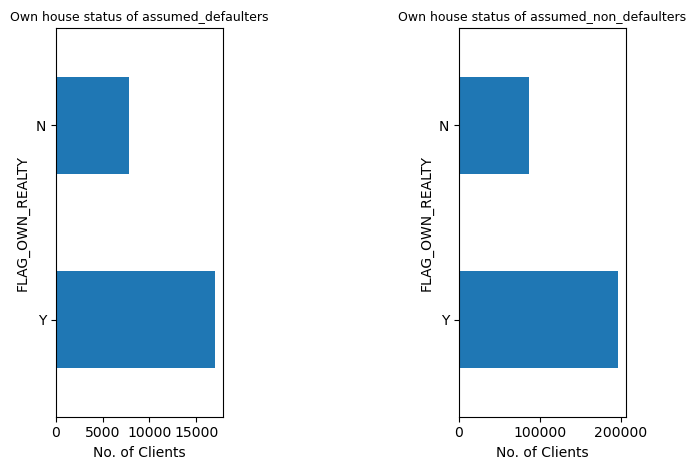

In [164]:
plt.subplot(1,2,1)
client_payment_diff.FLAG_OWN_REALTY.value_counts().plot.barh()
plt.title("Own house status of assumed_defaulters", fontsize=9)
plt.xlabel("No. of Clients")
plt.tight_layout(w_pad=17.0)
plt.subplot(1,2,2)
client_no_payment_diff.FLAG_OWN_REALTY.value_counts().plot.barh()
plt.title("Own house status of assumed_non_defaulters", fontsize=9)
plt.xlabel("No. of Clients")

### Observation:
- From the above two comparisons, most of the clients have no own car but have own house.

### Univariate analysis of OCCUPATION_TYPE for both types of clients

Text(0.5, 0, 'No. of Clients')

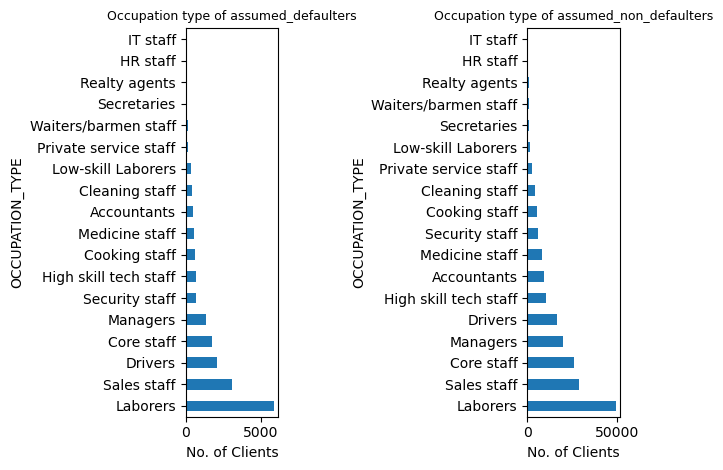

In [165]:
plt.subplot(1,2,1)
client_payment_diff.OCCUPATION_TYPE.value_counts().plot.barh()
plt.title("Occupation type of assumed_defaulters", fontsize=9)
plt.xlabel("No. of Clients")
plt.tight_layout(w_pad=17.0)
plt.subplot(1,2,2)
client_no_payment_diff.OCCUPATION_TYPE.value_counts().plot.barh()
plt.title("Occupation type of assumed_non_defaulters", fontsize=9)
plt.xlabel("No. of Clients")

### Observation:
- It is obvious from the chart that, both the types of clients are laboreres in majority and sales staff.

### Univariate analysis of children count for both types of clients¶

Text(0.5, 0, 'No. of Clients')

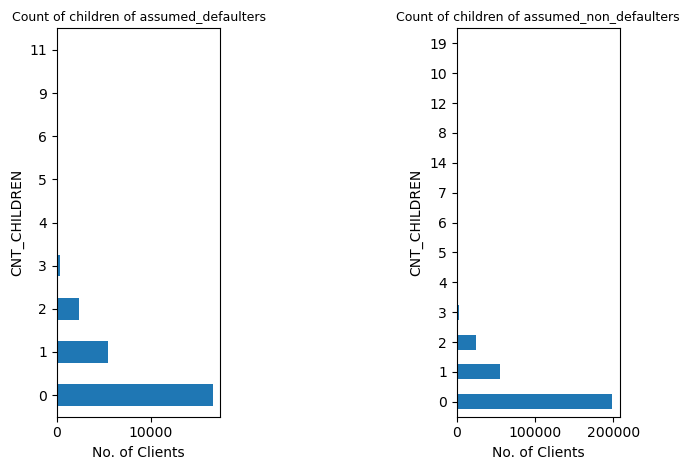

In [166]:
plt.subplot(1,2,1)
client_payment_diff.CNT_CHILDREN.value_counts().plot.barh()
plt.title("Count of children of assumed_defaulters", fontsize=9)
plt.xlabel("No. of Clients")
plt.tight_layout(w_pad=17.0)
plt.subplot(1,2,2)
client_no_payment_diff.CNT_CHILDREN.value_counts().plot.barh()
plt.title("Count of children of assumed_non_defaulters", fontsize=9)
plt.xlabel("No. of Clients")

### Observation:
- It is quite surprising that, most of assumed defaulters also have no children, but what stopping them from replaying the loan is still unknown. Lets analyse much deeper to get the answer.

### Univariate analysis of family members count for both types of clients¶

Text(0.5, 0, 'No. of Clients')

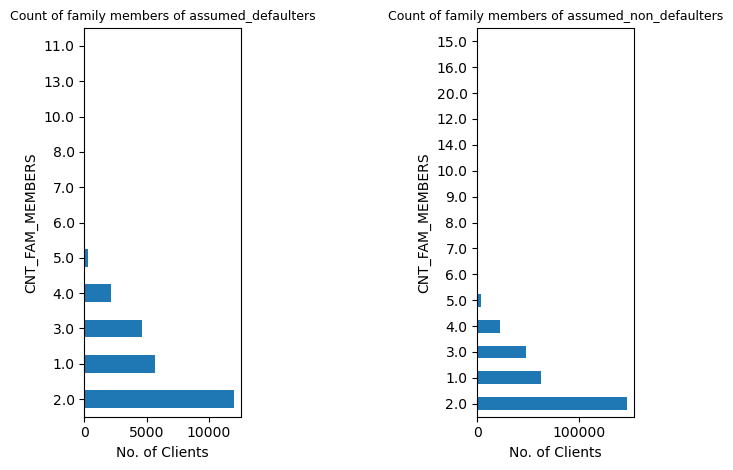

In [167]:
plt.subplot(1,2,1)
client_payment_diff.CNT_FAM_MEMBERS.value_counts().plot.barh()
plt.title("Count of family members of assumed_defaulters", fontsize=9)
plt.xlabel("No. of Clients")
plt.tight_layout(w_pad=17.0)
plt.subplot(1,2,2)
client_no_payment_diff.CNT_FAM_MEMBERS.value_counts().plot.barh()
plt.title("Count of family members of assumed_non_defaulters", fontsize=9)
plt.xlabel("No. of Clients")

### Observation:
- It is quite surprising that, most of assumed defaulters also have only 2 in the family, but what stopping them from replaying the loan is still unknown. Lets analyse much deeper to get the answer.

## Bivariate Analyisis
- From the above univariate analysis of both types of clients ie(assumed_defaulters and assumed_non_defaulters) there is no much insight driven, since both the graphs looked alike for most of the variable.
- Therefore, from now, we can concentrate much on assumed_defaulters by performing various bivariate and multi variate analysis to drive useful insights.

In [168]:
#Getting info of assumed defaulters
client_payment_diff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24825 entries, 0 to 307509
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  24825 non-null  int64  
 1   TARGET                      24825 non-null  int64  
 2   NAME_CONTRACT_TYPE          24825 non-null  object 
 3   CODE_GENDER                 24825 non-null  object 
 4   FLAG_OWN_CAR                24825 non-null  object 
 5   FLAG_OWN_REALTY             24825 non-null  object 
 6   CNT_CHILDREN                24825 non-null  int64  
 7   AMT_INCOME_TOTAL            24825 non-null  float64
 8   AMT_CREDIT                  24825 non-null  float64
 9   AMT_ANNUITY                 24825 non-null  float64
 10  AMT_GOODS_PRICE             24825 non-null  float64
 11  NAME_TYPE_SUITE             24825 non-null  object 
 12  NAME_INCOME_TYPE            24825 non-null  object 
 13  NAME_EDUCATION_TYPE         24825 n

### Bivariate analysis  [categorical vs numerical] of occupation type vs average income of defaulters

Text(0.5, 0, 'Average Income of clients')

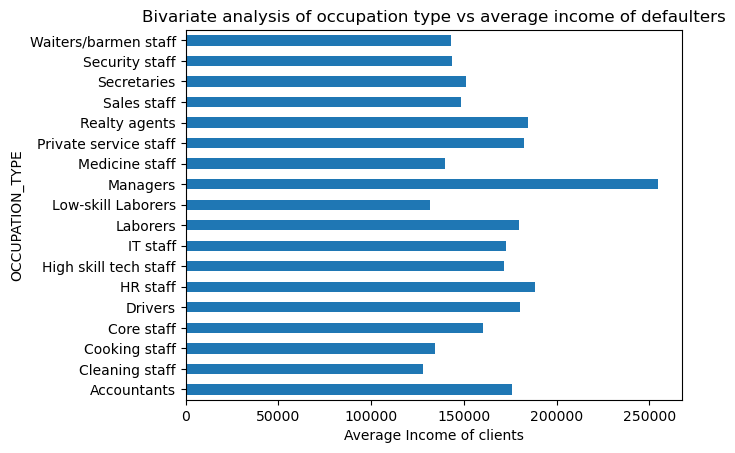

In [169]:
#bivariate analysing using groupby function
client_payment_diff.groupby("OCCUPATION_TYPE")['AMT_INCOME_TOTAL'].mean().plot.barh()
plt.title("Bivariate analysis of occupation type vs average income of defaulters")
plt.xlabel("Average Income of clients")

### Observation:
- Among all of the occupation type, managers are getting higher income, which is obvious.
- On an average, There is no occupation type receiving income below 1Lakhs.


### Bivariate analysis [categorical vs numerical] of occupation type vs credit amount of defaulters

Text(0.5, 0, 'Average credit amount of clients')

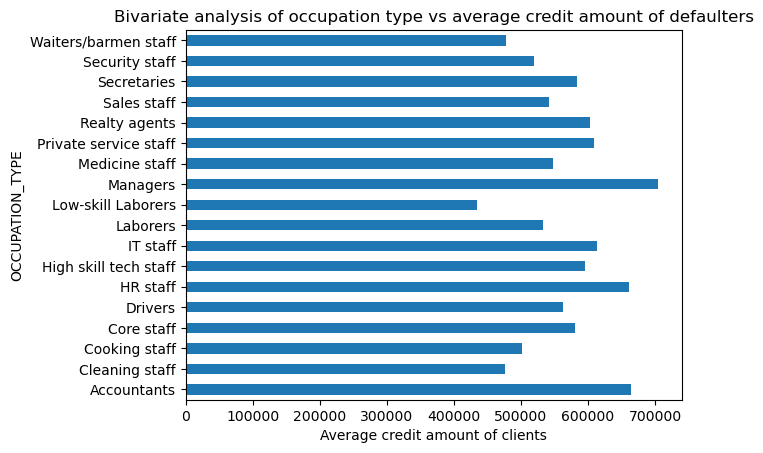

In [170]:
client_payment_diff.groupby("OCCUPATION_TYPE")['AMT_CREDIT'].mean().plot.barh()
plt.title("Bivariate analysis of occupation type vs average credit amount of defaulters")
plt.xlabel("Average credit amount of clients")

### Observation:
- Again the managers leads the top followed by acccountants and others.

### Bivariate analysis [numerical vs numerical] of credit amout and good price of defaulters

Text(0.5, 1.0, 'Bivariate analysis of Credit amount and Goods Price')

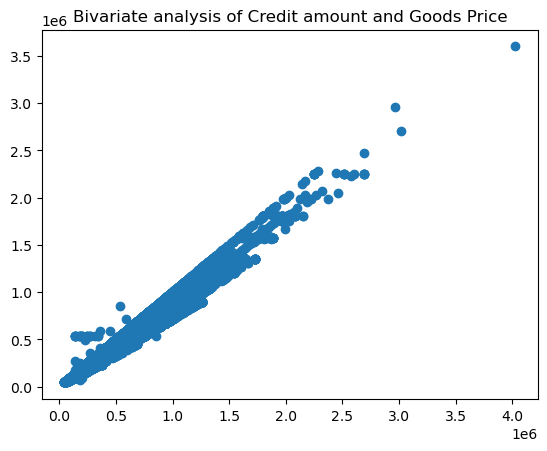

In [171]:
plt.scatter(client_payment_diff.AMT_CREDIT, client_payment_diff.AMT_GOODS_PRICE)
plt.title("Bivariate analysis of Credit amount and Goods Price")

### Observation:
- Higher the credit amount, higher the goods price. Hence proved by this high liner cor-relation of these two varibales

### Bivariate analysis [categorical vs numerical ] of Occupation type and DEF_60_CNT_SOCIAL_CIRCLE 

Text(0.5, 1.0, 'Bivariate analysis of Occupation type and observed social circle')

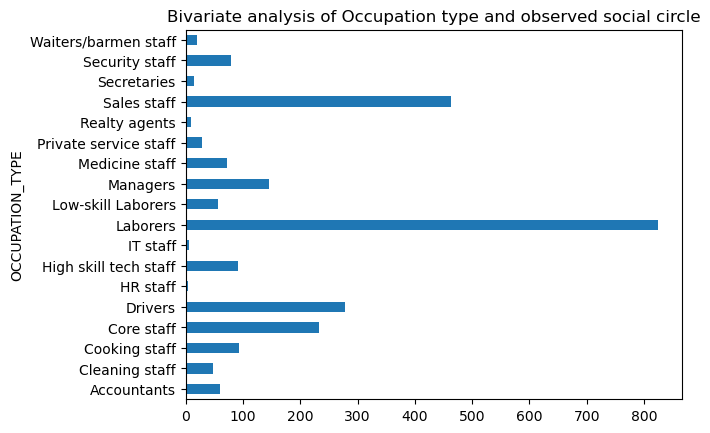

In [172]:
Def_60_cnt_social_circle_above_0 = client_payment_diff[client_payment_diff.DEF_60_CNT_SOCIAL_CIRCLE > 0]
Def_60_cnt_social_circle_above_0.groupby("OCCUPATION_TYPE")['DEF_60_CNT_SOCIAL_CIRCLE'].sum().plot.barh()
plt.title("Bivariate analysis of Occupation type and observed social circle")

### Observation:
- It gives us great insight above the occupation of the suspected defaulters.
- Laborers have the highest observation of social surroundings defaulted on past 60 days followed by Sales staffs and drivers.
- From the information above, we can suspect most of the Laborers and sales staffs to be defaulters in this new application

### Multivariate analysis of Age_buckets, Gender and Credit amount of the defaulters

Text(0.5, 1.0, 'Multivariate Analysis of Age_buckets, Gender and Credit amount using seaborn heatmap')

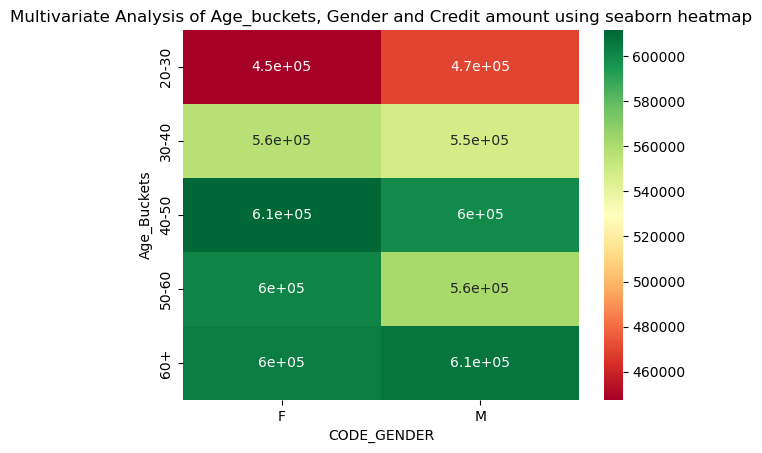

In [173]:
#Creating pivot table for three varibales. 
multivariate_analysis = pd.pivot_table(client_payment_diff, index="Age_Buckets", columns="CODE_GENDER", values="AMT_CREDIT", aggfunc=np.mean)
sns.heatmap(multivariate_analysis, annot=True, cmap="RdYlGn")
plt.title("Multivariate Analysis of Age_buckets, Gender and Credit amount using seaborn heatmap")

### Observation:
- From the above heatmap, it is obviously seen that, assumed defaulters above 60+ have got the maximum credit amount regardless of gender.
- Whereas assumed defaulters between age group of 30-40 have got comparatively less credit amount regardless of gender.
- Female assumed defaulters of age group 50-60 relatively have high credit amount than Male assumed defaulters of same age group.

### Approaching towards defaulters 

In [174]:
defaulters = client_payment_diff[(client_payment_diff.DEF_60_CNT_SOCIAL_CIRCLE > 0) & (client_payment_diff.DAYS_LAST_PHONE_CHANGE <= 5)]
defaulters.shape

(2629, 38)

### Note:
- assumed defaulters with number of observation of social surroundings defaulted on 60 past days greater 0 and change of phone within 5 days of application may be quite suspectable and those assumed defaulters are filtered and grouped under separate dataframe called defaulters.
- From this defaulters dataset, let us derive more insights.


##### The Annuity amount of each client should be less than 40% of income amount, so that there wont be problem in replaying the loan through installments.

In [175]:
defaulters['Installment_easy'] = np.where(defaulters.AMT_ANNUITY < (defaulters.AMT_INCOME_TOTAL*0.40), "yes", "no")

In [176]:
defaulters_2 = defaulters[defaulters.Installment_easy=="no"]
defaulters_2.shape

(62, 39)

### Note:
- There are 62 clients whose annuity amount is greater than 40% of their total income. Therefore these clients will face difficulties while repaying the monthly installments.

# Lets Explore previous_application dataset to get more vaulable insights

In [180]:
previous_appplication_dataset.head()
previous_appplication_dataset.shape

(1670214, 29)

### Removing/Dropping unnecessary columns:

In [181]:
#Creating a list of name of columns to be dropped
drop_cols = ["WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START", "FLAG_LAST_APPL_PER_CONTRACT", "NFLAG_LAST_APPL_IN_DAY", "RATE_INTEREST_PRIVILEGED", "SELLERPLACE_AREA", "NAME_SELLER_INDUSTRY",
            "NAME_YIELD_GROUP"]
#dropping the columns
previous_appplication_dataset = previous_appplication_dataset.drop(columns=drop_cols, axis=1)

KeyError: "['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_INTEREST_PRIVILEGED', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP'] not found in axis"

In [182]:
previous_appplication_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 29 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SK_ID_PREV                 1670214 non-null  int64  
 1   SK_ID_CURR                 1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE         1670214 non-null  object 
 3   AMT_ANNUITY                1297979 non-null  float64
 4   AMT_APPLICATION            1670214 non-null  float64
 5   AMT_CREDIT                 1670213 non-null  float64
 6   AMT_DOWN_PAYMENT           774370 non-null   float64
 7   AMT_GOODS_PRICE            1284699 non-null  float64
 8   RATE_DOWN_PAYMENT          774370 non-null   float64
 9   RATE_INTEREST_PRIMARY      5951 non-null     float64
 10  NAME_CASH_LOAN_PURPOSE     1670214 non-null  object 
 11  NAME_CONTRACT_STATUS       1670214 non-null  object 
 12  DAYS_DECISION              1670214 non-null  int64  
 13  NAME_PAYMENT

#### Checking null values in the columns of previous_application_dataset

In [183]:
previous_appplication_dataset.isnull().sum() * 100/len(previous_appplication_dataset)

SK_ID_PREV                    0.000000
SK_ID_CURR                    0.000000
NAME_CONTRACT_TYPE            0.000000
AMT_ANNUITY                  22.286665
AMT_APPLICATION               0.000000
AMT_CREDIT                    0.000060
AMT_DOWN_PAYMENT             53.636480
AMT_GOODS_PRICE              23.081773
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
NAME_CASH_LOAN_PURPOSE        0.000000
NAME_CONTRACT_STATUS          0.000000
DAYS_DECISION                 0.000000
NAME_PAYMENT_TYPE             0.000000
CODE_REJECT_REASON            0.000000
NAME_TYPE_SUITE              49.119754
NAME_CLIENT_TYPE              0.000000
NAME_GOODS_CATEGORY           0.000000
NAME_PORTFOLIO                0.000000
NAME_PRODUCT_TYPE             0.000000
CHANNEL_TYPE                  0.000000
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION

#### Dropping columns having more than 40% of missing data

In [184]:
drop_cols_40percent_missing_data = ["AMT_DOWN_PAYMENT", "RATE_DOWN_PAYMENT", "RATE_INTEREST_PRIMARY", "NAME_TYPE_SUITE", "DAYS_FIRST_DRAWING", "DAYS_FIRST_DUE", "DAYS_LAST_DUE_1ST_VERSION",
                                   "DAYS_LAST_DUE", "DAYS_TERMINATION", "NFLAG_INSURED_ON_APPROVAL"]
previous_appplication_dataset = previous_appplication_dataset.drop(columns=drop_cols_40percent_missing_data, axis=1)

In [185]:
#previous_appplication_dataset.info()
previous_appplication_dataset.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY               372235
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE           385515
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
CNT_PAYMENT               372230
PRODUCT_COMBINATION          346
dtype: int64

### Fixing rows and columns

#### Analysing the AMT_ANNUITY, AMT_GOODS_PRICE, CNT_PAYMENT and PRODUCT_COMBINATION columns as they are having nearly 25% of missing data

In [186]:
previous_appplication_dataset.AMT_ANNUITY.value_counts()

AMT_ANNUITY
2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
3794.445         1
8723.160         1
27948.330        1
25374.285        1
14704.290        1
Name: count, Length: 357959, dtype: int64

#### Since, AMT_ANNUITY is something that depends on each client's credit value and the interest rate. Immputation of any mean, mode, median may mislead the dataset with wrong data. So it is better to ignore those missing values in AMT_ANNUITY

In [187]:
previous_appplication_dataset.AMT_GOODS_PRICE.value_counts()

AMT_GOODS_PRICE
45000.00     47831
225000.00    43549
135000.00    40666
450000.00    38926
90000.00     29367
             ...  
185292.00        1
225054.00        1
156212.55        1
99896.31         1
267295.50        1
Name: count, Length: 93885, dtype: int64

#### The null values in AMT_GOODS_PRICE is may be because that specific client did not buy any goods. Therefore we can impute 0 in the null values.

In [188]:
#imputing 0 in place of null values in AMT_GOODS_PRICE column
previous_appplication_dataset.AMT_GOODS_PRICE = previous_appplication_dataset.AMT_GOODS_PRICE.fillna(0)

In [189]:
#Ensure all the null values in AMT_GOODS_PRICE is replaced with 0 and check for CNT_PAYMENT column
previous_appplication_dataset.isnull().sum()
previous_appplication_dataset.CNT_PAYMENT.value_counts()

CNT_PAYMENT
12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
28.0         8
29.0         8
32.0         6
19.0         6
34.0         4
59.0         4
41.0         3
47.0         3
45.0         3
21.0         3
44.0         2
39.0         2
46.0         2
38.0         2
33.0         1
40.0         1
53.0         1
Name: count, dtype: int64

#### It is same as AMT_ANNUITY, since CNT payment depends on each clients credit value and their interest rate. So Imputation may lead to wrong insights. So we can ignore the null values present in the CNT_PAYMENT column

In [190]:
previous_appplication_dataset.PRODUCT_COMBINATION.value_counts()

PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: count, dtype: int64

#### Since PRODUCT_COMBINATION is a categorical variable, we can impute the mode of this column in null values

In [191]:
print(previous_appplication_dataset.PRODUCT_COMBINATION.mode())
previous_appplication_dataset.PRODUCT_COMBINATION = previous_appplication_dataset.PRODUCT_COMBINATION.fillna("Cash")

0    Cash
Name: PRODUCT_COMBINATION, dtype: object


In [192]:
previous_appplication_dataset.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY               372235
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE                0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
CNT_PAYMENT               372230
PRODUCT_COMBINATION            0
dtype: int64

## Merging of two dataframe application_dataset and previous_application_dataset to derive more valuable insights.

- Before merging the two dataframes, lets rename the columns by prefixing 'P' for each of column in previous_application_dataset except SK_ID_CURR to avoid data confusion

In [193]:
#Renaming the cols in previous_application_dataset except SK_ID_CURR
cols_list = list(previous_appplication_dataset.columns)
new_col_list=[]
for col in cols_list:
    if col == "SK_ID_CURR":
        new_col_list.append(col)
        continue
    else:
        col = "P_"+col
        new_col_list.append(col)
print(new_col_list)
previous_appplication_dataset = previous_appplication_dataset.set_axis(new_col_list, axis="columns")

['P_SK_ID_PREV', 'SK_ID_CURR', 'P_NAME_CONTRACT_TYPE', 'P_AMT_ANNUITY', 'P_AMT_APPLICATION', 'P_AMT_CREDIT', 'P_AMT_GOODS_PRICE', 'P_NAME_CASH_LOAN_PURPOSE', 'P_NAME_CONTRACT_STATUS', 'P_DAYS_DECISION', 'P_NAME_PAYMENT_TYPE', 'P_CODE_REJECT_REASON', 'P_NAME_CLIENT_TYPE', 'P_NAME_GOODS_CATEGORY', 'P_NAME_PORTFOLIO', 'P_NAME_PRODUCT_TYPE', 'P_CHANNEL_TYPE', 'P_CNT_PAYMENT', 'P_PRODUCT_COMBINATION']


In [194]:
#Merging of two dataframes (application_dataset & previous_application_dataset)
merged_dataset = pd.merge(application_dataset, previous_appplication_dataset, on="SK_ID_CURR")

In [195]:
#Getting shape of the newly merged dataset
merged_dataset.shape

(1413701, 52)

In [196]:
#Getting infor of the newly merged dataset
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 52 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_CURR                  1413701 non-null  int64  
 1   TARGET                      1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE          1413701 non-null  object 
 3   CODE_GENDER                 1413701 non-null  object 
 4   FLAG_OWN_CAR                1413701 non-null  object 
 5   FLAG_OWN_REALTY             1413701 non-null  object 
 6   CNT_CHILDREN                1413701 non-null  int64  
 7   AMT_INCOME_TOTAL            1413701 non-null  float64
 8   AMT_CREDIT                  1413701 non-null  float64
 9   AMT_ANNUITY                 1413701 non-null  float64
 10  AMT_GOODS_PRICE             1413701 non-null  float64
 11  NAME_TYPE_SUITE             1413701 non-null  object 
 12  NAME_INCOME_TYPE            1413701 non-null  object 
 1

In [197]:
#Checking the null values in the newly merged dataset
merged_dataset.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_EMAIL                         0
OCCUPATION_TYPE               457580
C

### Observation:
- As expected, the columns  OCCUPATION_TYPE, P_AMT_ANNUITY and P_CNT_PAYMENT have more null values. We can ignore as we did above

## Analysing the merged dataset and approach towards the goal of finding the defaulters

### Notes:
- Creating a dataframe called "final_defaulters" by conditioning (merged_dataset.TARGET == 1) & (merged_dataset.DEF_60_CNT_SOCIAL_CIRCLE > 0) & (merged_dataset.DAYS_LAST_PHONE_CHANGE <= 5)

In [198]:
final_defaulters = merged_dataset[(merged_dataset.TARGET == 1) & (merged_dataset.DEF_60_CNT_SOCIAL_CIRCLE > 0) & (merged_dataset.DAYS_LAST_PHONE_CHANGE <= 5)]

In [199]:
final_defaulters['Installment_easy'] = np.where(final_defaulters.AMT_ANNUITY < (final_defaulters.AMT_INCOME_TOTAL*0.40), "yes", "no")
final_defaulters = final_defaulters[final_defaulters.Installment_easy == "no"]

In [200]:
final_defaulters.shape

(273, 53)

In [201]:
final_defaulters.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_EMAIL                      0
OCCUPATION_TYPE               137
CNT_FAM_MEMBERS                 0
REG_REGION_NOT_LIVE_REGION      0
REG_CITY_NOT_L

## Bivariate and Multivariate analysis of merged dataset

### Important variable : P_NAME_CONTRACT_STATUS

In [202]:
final_defaulters.P_NAME_CONTRACT_STATUS.value_counts()

P_NAME_CONTRACT_STATUS
Approved        185
Refused          50
Canceled         32
Unused offer      6
Name: count, dtype: int64

### Bivariate analysis of previous contract status of the client and the current average annuity amount

Text(0.5, 1.0, 'Bivariate analysis of previous contract status of the client and the current average annuity amount')

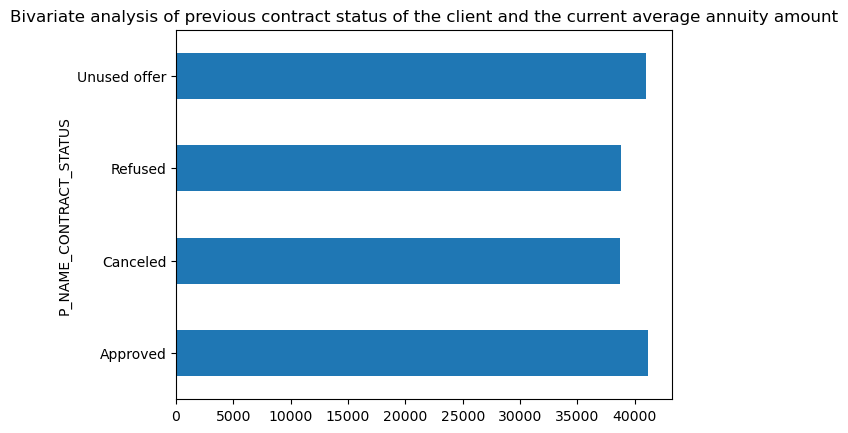

In [203]:
final_defaulters.groupby("P_NAME_CONTRACT_STATUS")['AMT_ANNUITY'].mean().plot.barh()
plt.title("Bivariate analysis of previous contract status of the client and the current average annuity amount")

### Observation
1. There is high current annuity amount for clients who have previous unused offer. This insight may give us prediction like, even in new application, these clients will unuse the offer even after approved.
2. The previously approved application despite of how high the annuity amount is, there are chances where these clients can repay the installments perfectly.
3. The clients who canceled their previous application may have 30% chances of repaying the loan in the new application.

In [204]:
final_defaulters.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Cash loans    273
Name: count, dtype: int64

### Multivariate Analysis of P_NAME_CONTRACT_STATUS, NAME_FAMILY_STATUS and AMT_CREDIT

Text(0.5, 1.0, 'Multivariate Analysis of P_NAME_CONTRACT_STATUS, NAME_FAMILY_STATUS and AMT_CREDIT')

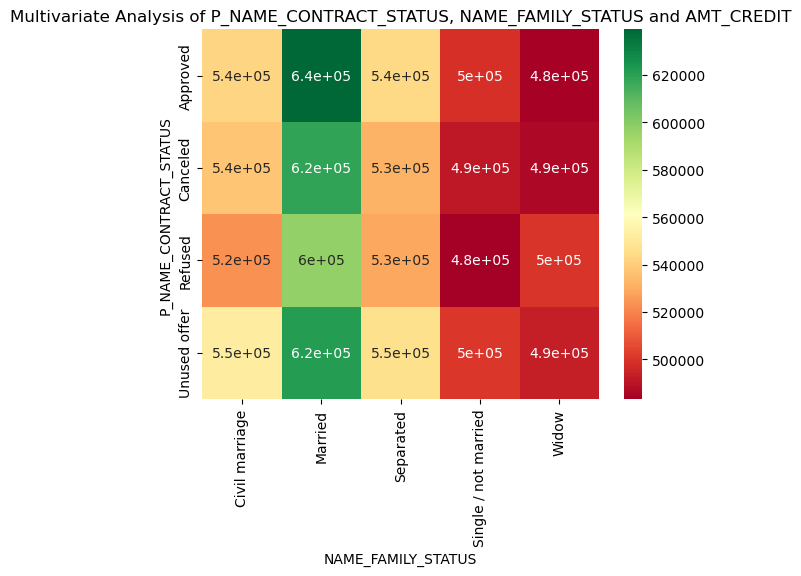

In [205]:
res = pd.pivot_table(merged_dataset, index="P_NAME_CONTRACT_STATUS", columns = "NAME_FAMILY_STATUS", values="AMT_CREDIT", aggfunc=np.mean)
sns.heatmap(res, annot=True, cmap="RdYlGn")
plt.title("Multivariate Analysis of P_NAME_CONTRACT_STATUS, NAME_FAMILY_STATUS and AMT_CREDIT")

### Observation:
- From the above heatmap, it is evident that, married clients whose previous application was approved have the highest average credit amount in this new application.
- Single/not married clients who have canceled the previous application have the lowest credit amount in this new application. If their excepted credit amount is not sanctioned, they are chances that these clients would again cancel the application.
- Most of Window clients previous application has been refused. But there are chances for widow to repay the loan only after considering other criterias.

Text(0.5, 1.0, 'Multivariate analysis of P_NAME_CONTRACT_STATUS, NAME_FAMILY_STATUS and AMT_CREDIT of defaulters')

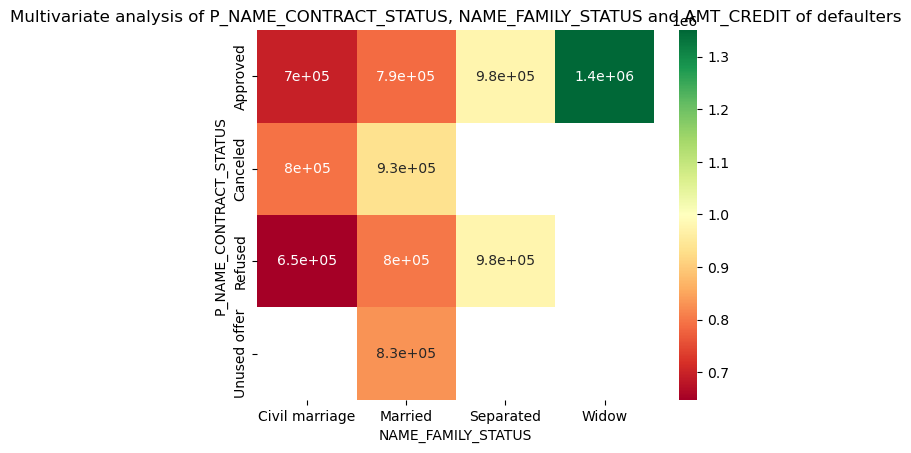

In [206]:
fd = pd.pivot_table(final_defaulters, index="P_NAME_CONTRACT_STATUS", columns = "NAME_FAMILY_STATUS", values="AMT_CREDIT", aggfunc=np.mean)
sns.heatmap(fd, annot=True, cmap="RdYlGn")
plt.title("Multivariate analysis of P_NAME_CONTRACT_STATUS, NAME_FAMILY_STATUS and AMT_CREDIT of defaulters")

In [207]:
 final_defaulters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 27532 to 1412934
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  273 non-null    int64  
 1   TARGET                      273 non-null    int64  
 2   NAME_CONTRACT_TYPE          273 non-null    object 
 3   CODE_GENDER                 273 non-null    object 
 4   FLAG_OWN_CAR                273 non-null    object 
 5   FLAG_OWN_REALTY             273 non-null    object 
 6   CNT_CHILDREN                273 non-null    int64  
 7   AMT_INCOME_TOTAL            273 non-null    float64
 8   AMT_CREDIT                  273 non-null    float64
 9   AMT_ANNUITY                 273 non-null    float64
 10  AMT_GOODS_PRICE             273 non-null    float64
 11  NAME_TYPE_SUITE             273 non-null    object 
 12  NAME_INCOME_TYPE            273 non-null    object 
 13  NAME_EDUCATION_TYPE         273 

In [208]:
final_defaulters.P_NAME_CASH_LOAN_PURPOSE.value_counts()

P_NAME_CASH_LOAN_PURPOSE
XAP             144
XNA             118
Other             5
Urgent needs      5
Repairs           1
Name: count, dtype: int64

In [209]:
final_defaulters.P_CODE_REJECT_REASON.value_counts()

P_CODE_REJECT_REASON
XAP       217
HC         33
LIMIT       6
CLIENT      6
SCO         6
SCOFR       5
Name: count, dtype: int64

Text(0.5, 1.0, 'Multivariate analysis of OCCUPATION_TYPE, P_NAME_CONTRACT_STATUS and AMT_CREDIT of defaulters')

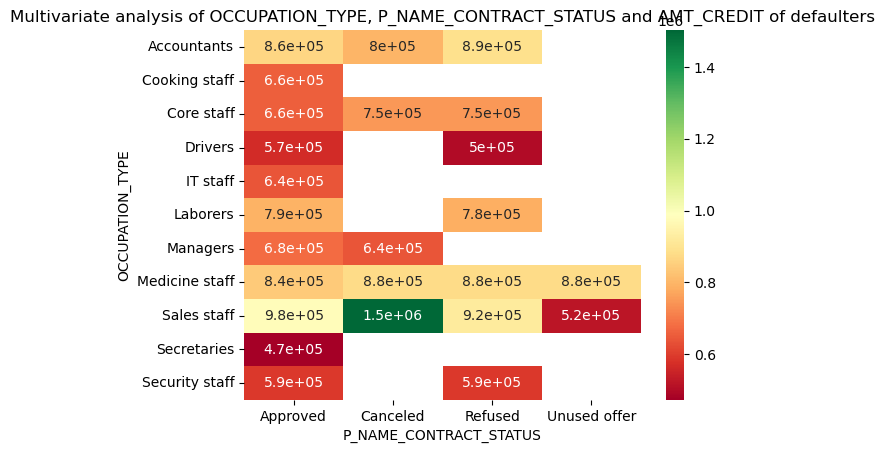

In [210]:
fd_1 = pd.pivot_table(final_defaulters, index="OCCUPATION_TYPE", columns="P_NAME_CONTRACT_STATUS", values="AMT_CREDIT", aggfunc=np.mean)
sns.heatmap(fd_1, annot=True, cmap="RdYlGn")
plt.title("Multivariate analysis of OCCUPATION_TYPE, P_NAME_CONTRACT_STATUS and AMT_CREDIT of defaulters")

###  Observations:
- Sales staff who cancelled their previous application have high average credit amount in this new application. But the chances of repaying the loan in installments is quite miserable again.
- Secruity staff whose previous application has been approved have 40% of chances to repay the loan in installments for this new application.

In [101]:
final_defaulters.shape

(273, 53)